   # IMPLEMENTING RANDOM FOREST ALGORITHM

In [1]:
#import library packages
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load given dataset
data = pd.read_csv("heart.csv")

In [4]:
df = data.dropna()

In [5]:
del df['Age.Group']
del df['Locality']
del df['Gender']

In [6]:
df.columns

Index(['Age', 'Marital_status', 'Sleep', 'Depression', 'Smoking', 'Diabetes',
       'BP', 'Hypersensitivity', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'Mortality'],
      dtype='object')

In [7]:
df.head()

Age Marital_status Sleep Depression Smoking  Diabetes     BP  \
0   45        MARRIED    NO        YES      NO         1  100.6   
1   51        MARRIED    NO        YES      NO         0   90.6   
2   55        MARRIED   YES        YES      NO         1  100.7   
3   55        MARRIED   YES        YES      NO         1  160.1   
4   56        MARRIED    NO        YES      NO         1   90.6   

  Hypersensitivity  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0               NO   4       132   341    1        2      136      1      3.0   
1               NO   4       130   305    0        0      142      1      1.2   
2               NO   4       180   327    0        1      117      1      3.4   
3               NO   4       128   205    0        1      130      1      2.0   
4               NO   4       200   288    1        2      133      1      4.0   

   slope  ca  thal  Mortality  
0      2   0     7          0  
1      2   0     7          0  
2      2   0     3          0  
3      2   1     7          0  
4      3   2     7          0

In [13]:
from sklearn.preprocessing import LabelEncoder
var_mod = ['Marital_status', 'Sleep', 'Depression', 'Smoking', 'Hypersensitivity']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i]).astype(int)

In [14]:
#preprocessing, split test and dataset, split response variable
X = df.drop(labels='Mortality', axis=1)
#Response variable
y = df.loc[:,'Mortality']  

In [15]:
import imblearn
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

ros =RandomOverSampler(random_state=42)
x_ros,y_ros=ros.fit_resample(X,y)
print("o d s: ",Counter(y))
print("r d s: ",Counter(y_ros))

o d s:  Counter({0: 288, 1: 80})
r d s:  Counter({0: 288, 1: 288})


In [16]:
df.head()

Age  Marital_status  Sleep  Depression  Smoking  Diabetes     BP  \
0   45               0      0           1        0         1  100.6   
1   51               0      0           1        0         0   90.6   
2   55               0      1           1        0         1  100.7   
3   55               0      1           1        0         1  160.1   
4   56               0      0           1        0         1   90.6   

   Hypersensitivity  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0                 0   4       132   341    1        2      136      1   
1                 0   4       130   305    0        0      142      1   
2                 0   4       180   327    0        1      117      1   
3                 0   4       128   205    0        1      130      1   
4                 0   4       200   288    1        2      133      1   

   oldpeak  slope  ca  thal  Mortality  
0      3.0      2   0     7          0  
1      1.2      2   0     7          0  
2      3.4      2   0     3          0  
3      2.0      2   1     7          0  
4      4.0      3   2     7          0

In [17]:
x_ros

Age  Marital_status  Sleep  Depression  Smoking  Diabetes     BP  \
0     45               0      0           1        0         1  100.6   
1     51               0      0           1        0         0   90.6   
2     55               0      1           1        0         1  100.7   
3     55               0      1           1        0         1  160.1   
4     56               0      0           1        0         1   90.6   
..   ...             ...    ...         ...      ...       ...    ...   
571   52               0      1           1        1         0  140.9   
572   59               0      1           1        0         1  160.1   
573   45               0      0           1        1         0  110.7   
574   61               0      1           1        0         1  120.8   
575   44               0      1           1        0         0  100.7   

     Hypersensitivity  cp  trestbps  chol  fbs  restecg  thalach  exang  \
0                   0   4       132   341    1        2      136      1   
1                   0   4       130   305    0        0      142      1   
2                   0   4       180   327    0        1      117      1   
3                   0   4       128   205    0        1      130      1   
4                   0   4       200   288    1        2      133      1   
..                ...  ..       ...   ...  ...      ...      ...    ...   
571                 0   4       120   249    0        2      144      0   
572                 0   4       174   249    0        0      143      1   
573                 0   4       136   315    0        0      125      1   
574                 0   4       130   330    0        2      169      0   
575                 0   4       110   172    0        2      158      0   

     oldpeak  slope  ca  thal  
0        3.0      2   0     7  
1        1.2      2   0     7  
2        3.4      2   0     3  
3        2.0      2   1     7  
4        4.0      3   2     7  
..       ...    ...  ..   ...  
571      0.8      1   0     7  
572      0.0      2   0     3  
573      1.8      2   0     6  
574      0.0      1   0     3  
575      0.0      1   0     7  

[576 rows x 19 columns]

In [18]:
#Splitting for train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.30, random_state=42, stratify=y_ros)
print("Number of training dataset: ", len(X_train))
print("Number of test dataset: ", len(X_test))
print("Total number of dataset: ", len(X_train)+len(X_test))

Number of training dataset:  403
Number of test dataset:  173
Total number of dataset:  576


In [19]:
X_train

Age  Marital_status  Sleep  Depression  Smoking  Diabetes     BP  \
82    58               0      0           1        0         0  120.8   
337   63               0      1           1        0         1  160.1   
288   56               0      0           1        1         0  160.7   
113   62               0      0           1        1         0   90.6   
167   54               0      0           1        1         1  140.9   
..   ...             ...    ...         ...      ...       ...    ...   
320   54               0      1           1        0         0  100.7   
437   46               0      0           1        1         1  110.7   
575   44               0      1           1        0         0  100.7   
563   50               0      0           1        0         1  100.6   
389   46               0      0           0        0         1   90.6   

     Hypersensitivity  cp  trestbps  chol  fbs  restecg  thalach  exang  \
82                  0   2       120   284    0        2      160      0   
337                 0   4       108   269    0        0      169      1   
288                 0   4       125   249    1        2      144      1   
113                 0   2       120   281    0        2      103      0   
167                 0   4       110   206    0        2      108      1   
..                ...  ..       ...   ...  ...      ...      ...    ...   
320                 0   4       122   286    0        2      116      1   
437                 0   4       132   247    1        2      143      1   
575                 0   4       110   172    0        2      158      0   
563                 1   4       110   197    0        2      177      0   
389                 0   4       132   247    1        2      143      1   

     oldpeak  slope  ca  thal  
82       1.8      2   0     3  
337      1.8      2   2     3  
288      1.2      2   1     3  
113      1.4      2   1     7  
167      0.0      2   1     3  
..       ...    ...  ..   ...  
320      3.2      2   2     3  
437      0.1      2   0     7  
575      0.0      1   0     7  
563      0.0      1   1     3  
389      0.1      2   0     7  

[403 rows x 19 columns]

In [20]:
y_train.value_counts()

1    202
0    201
Name: Mortality, dtype: int64

##### Implementing RandomForestClassifier Algo

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, plot_confusion_matrix

Training

In [22]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
predicted = rf.predict(X_test)

Finding Accuracy

In [23]:
accuracy = accuracy_score(y_test,predicted)
print('Accuracy of Random Forest Classifier',accuracy*100)

Accuracy of Random Forest Classifier 98.84393063583815


Finding Clasiification Report

In [24]:
cr = classification_report(y_test,predicted)
print('Classification report\n\n',cr)

Classification report

               precision    recall  f1-score   support

           0       0.99      0.99      0.99        87
           1       0.99      0.99      0.99        86

    accuracy                           0.99       173
   macro avg       0.99      0.99      0.99       173
weighted avg       0.99      0.99      0.99       173



Finding Confusion matrix

In [25]:
cm = confusion_matrix(y_test,predicted)
print('Confusion matrix\n\n',cm)

Confusion matrix

 [[86  1]
 [ 1 85]]


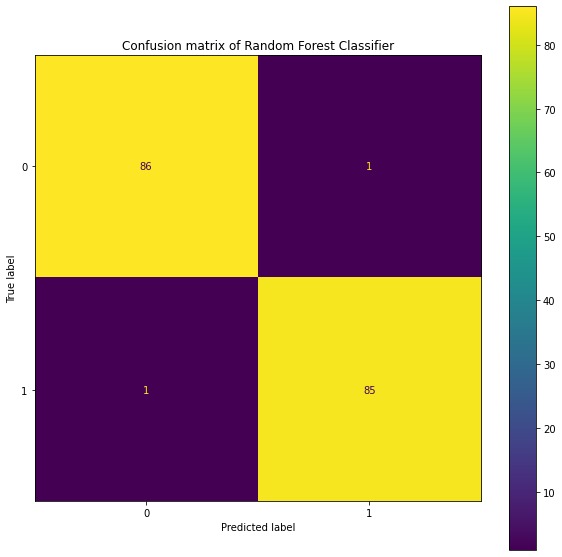

In [26]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(10,10))
plot_confusion_matrix(rf, X_test, y_test, ax=ax)
plt.title('Confusion matrix of Random Forest Classifier')
plt.show()

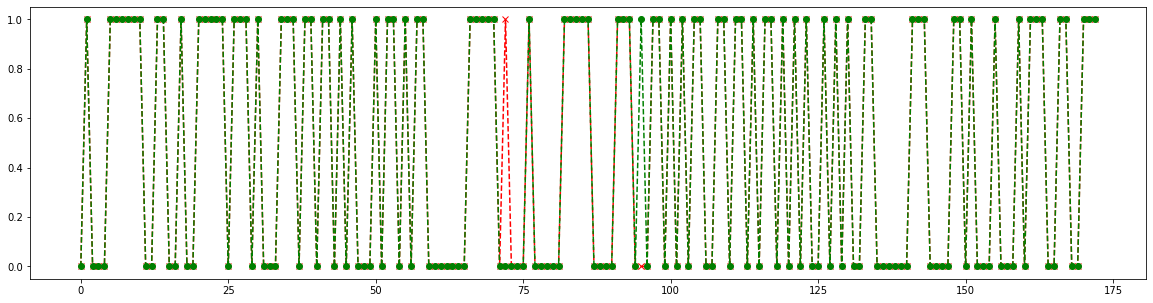

In [27]:
import matplotlib.pyplot as plt

df2 = pd.DataFrame()
df2["y_test"] = y_test
df2["predicted"] = predicted
df2.reset_index(inplace=True)
plt.figure(figsize=(20, 5))
plt.plot(df2["predicted"], marker='x', linestyle='dashed', color='red')
plt.plot(df2["y_test"],  marker='o', linestyle='dashed', color='green')
plt.show()

In [28]:
from joblib import dump
dump(rf, 'RF1.pkl')

['RF1.pkl']